# Анализ линейной зависимости между фичами (проверка корреляции)
матрицы корреляции и pairplot фичей

Входные данные data/interm/target_features.pkl из feature_engineering.ipynb уже рассчитанные фичи

анализ будет проводится без нестабильных фичей

In [1]:
import pandas as pd

In [2]:
pre = '../../' # путь до главной директории проекта

%run ../init.ipynb #подгрузить нужные библиотеки
%run ../params.ipynb #параметры как логин пароль к БИ, параметры расчёта ( в нашем случае их нет)
%run ../init_mdm.ipynb
%run ../preprocessing/preprocessing_target.ipynb
%run ../ML_functions.ipynb
%run ../auxiliary/plots.ipynb

In [3]:
name = pre + "data/interm/target_features.pkl"
target_features = pd.read_pickle(name, compression={'method':'zip'})
target_features['Метка дефолта'] = target_features['Метка фрод дефолта'].astype('int').astype('str')
print("Размер считанных данных target_class with mdm features- {}".format(target_features.shape))
# target_features.head(1)

Размер считанных данных target_class with mdm features- (85798, 40)


In [4]:
# сюда таблицы будем кидать, для отчетов
name = pre + "data/interm/auxilary/correlation.xlsx"
writer = ExcelWriter(name)

In [5]:
# все фичи, кроме тех, что были исключены на этапе проверки стабильности и репрезентативности

keep_columns = ['Приложение', 'Метка дефолта',  'no_contracts_total', 'no_transport_total',
       'no_contracts_active', 'no_transp_active', 'no_contracts_closed',
       'reason_гибель/тотал', 'reason_завершение',
       'reason_замена/перенайм/переуступка', 'reason_не указана',
       'reason_определена цессия', 'reason_отмена', 'reason_расторгнут',
       'reason_страховой случай', 'reason_страховой случай (гибель/тотал)',
       'bad_reasons_closed', 'good_reasons_closed',
       'not_determined_reasons_closed', 'mean_bad_reasons',
       'mean_good_reasons', 'mean_not_determined_reasons', 'no_creditors',
       'duration_max', 'duration_mean', 'duration_min',
       'end_date_first']

#  timedelta с делаем в днях и числовыми значениями
target_features = days_substitute(target_features)

df_features = target_features[keep_columns].copy()

# df_features.head(2)

Поскольку корреляция очень чувствительна к выбросам, то заменим outliers медианным значениями. 

В случае, когда распределение более 95% около 0, то такое распределение будет считаться не содержит outliers. В корреляции будут участвовать все значения


In [6]:
for feature in keep_columns:
   if feature in ['Приложение', 'Метка дефолта']:
      continue

   percentile_max = 1 if feature in ['reason_замена/перенайм/переуступка', 'reason_определена цессия', 
                                        'reason_расторгнут', 'reason_страховой случай', 'reason_страховой случай (гибель/тотал)', 
                                        'reason_гибель/тотал', 'bad_reasons_closed'] else 0.95
                                        
   df_features[feature] = replace_outliers_with_median_quantile(df_features[feature], upper = percentile_max)

### Матрица корреляции

In [7]:
correlation_matrix = df_features.corr().round(2)

# fig_corr = correlation_matrix_plot(correlation_matrix, height = 1000, width=1200)

Re-order correlation matrix using AgglomerativeClustering

In [8]:
1- np.abs(correlation_matrix)

,no_contracts_total,no_transport_total,no_contracts_active,no_transp_active,no_contracts_closed,reason_гибель/тотал,reason_завершение,reason_замена/перенайм/переуступка,reason_не указана,reason_определена цессия,reason_отмена,reason_расторгнут,reason_страховой случай,reason_страховой случай (гибель/тотал),bad_reasons_closed,good_reasons_closed,not_determined_reasons_closed,mean_bad_reasons,mean_good_reasons,mean_not_determined_reasons,no_creditors,duration_max,duration_mean,duration_min,end_date_first
no_contracts_total,0.00,0.18,0.27,0.36,0.51,0.96,0.69,0.99,0.63,0.97,0.78,0.93,0.89,0.98,0.93,0.69,0.59,0.96,0.78,0.66,0.45,0.65,0.64,0.78,0.65
no_transport_total,0.18,0.00,0.30,0.27,0.54,0.96,0.70,1.00,0.65,0.98,0.78,0.92,0.89,1.00,0.91,0.70,0.62,0.94,0.78,0.67,0.48,0.68,0.66,0.81,0.67
no_contracts_active,0.27,0.30,0.00,0.20,0.72,0.94,0.82,0.98,0.79,0.99,0.86,0.93,0.93,1.00,0.93,0.82,0.76,0.95,0.86,0.78,0.51,0.78,0.76,0.87,0.78
no_transp_active,0.36,0.27,0.20,0.00,0.74,0.94,0.82,1.00,0.81,0.98,0.86,0.93,0.93,1.00,0.93,0.82,0.78,0.95,0.85,0.78,0.55,0.79,0.78,0.88,0.79
no_contracts_closed,0.51,0.54,0.72,0.74,0.00,0.97,0.48,0.99,0.42,0.97,0.67,0.93,0.90,0.98,0.93,0.48,0.29,0.96,0.69,0.52,0.57,0.50,0.49,0.66,0.48
reason_гибель/тотал,0.96,0.96,0.94,0.94,0.97,0.00,0.98,1.00,0.99,1.00,0.98,1.00,0.99,1.00,0.96,0.98,0.99,0.83,0.98,0.98,0.94,1.00,0.94,1.00,0.98
reason_завершение,0.69,0.70,0.82,0.82,0.48,0.98,0.00,0.98,0.74,0.99,0.79,0.98,0.96,0.98,0.98,0.00,0.70,0.98,0.41,0.83,0.67,0.56,0.53,0.67,0.58
reason_замена/перенайм/переуступка,0.99,1.00,0.98,1.00,0.99,1.00,0.98,0.00,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.98,0.98,1.00,0.99,0.99,0.98,0.99,0.98,0.99,0.99
reason_не указана,0.63,0.65,0.79,0.81,0.42,0.99,0.74,0.99,0.00,0.98,0.79,0.92,0.93,1.00,0.92,0.74,0.27,0.97,0.87,0.48,0.62,0.55,0.55,0.69,0.57
reason_определена цессия,0.97,0.98,0.99,0.98,0.97,1.00,0.99,1.00,0.98,0.00,0.98,0.97,0.99,1.00,0.97,0.99,0.95,0.99,0.96,0.96,0.93,0.94,0.94,0.97,0.96


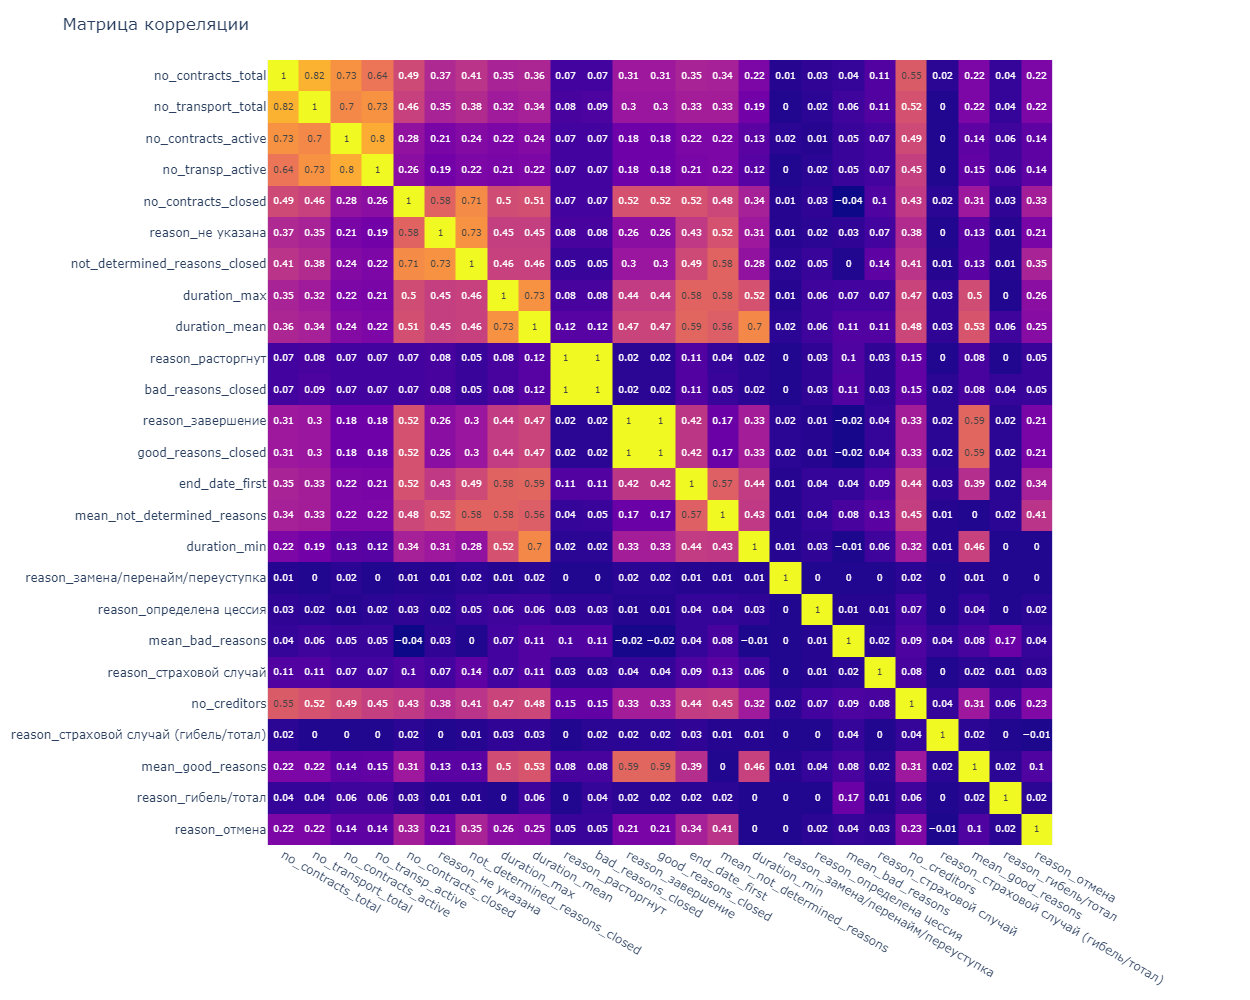

In [9]:
# convert correlation to distances
d = 2 * (1 - np.abs(correlation_matrix))

for n_clusters in range(17, 18):
    # print(n_clusters)
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='single', affinity="precomputed").fit(d)

    clusters = [list(correlation_matrix.columns[clustering.labels_==lab]) for lab in set(clustering.labels_)]
    clusters = sorted(clusters, key=len, reverse=True)
    # print(clusters)

    reordered = np.concatenate(clusters)
    R = correlation_matrix.loc[reordered, reordered]

    fig_corr = correlation_matrix_plot(R, height = 1000, width=1250)

fig_corr.write_html(pre+'data/html/correlation_matrix_target.html')

In [10]:
#  коррелированные группы
for cluster in clusters:
    print(cluster)

['no_contracts_total', 'no_transport_total', 'no_contracts_active', 'no_transp_active']
['no_contracts_closed', 'reason_не указана', 'not_determined_reasons_closed']
['duration_max', 'duration_mean']
['reason_расторгнут', 'bad_reasons_closed']
['reason_завершение', 'good_reasons_closed']
['end_date_first']
['mean_not_determined_reasons']
['duration_min']
['reason_замена/перенайм/переуступка']
['reason_определена цессия']
['mean_bad_reasons']
['reason_страховой случай']
['no_creditors']
['reason_страховой случай (гибель/тотал)']
['mean_good_reasons']
['reason_гибель/тотал']
['reason_отмена']


### pairplot коррелированных групп

Данные все (до удаления outliers)

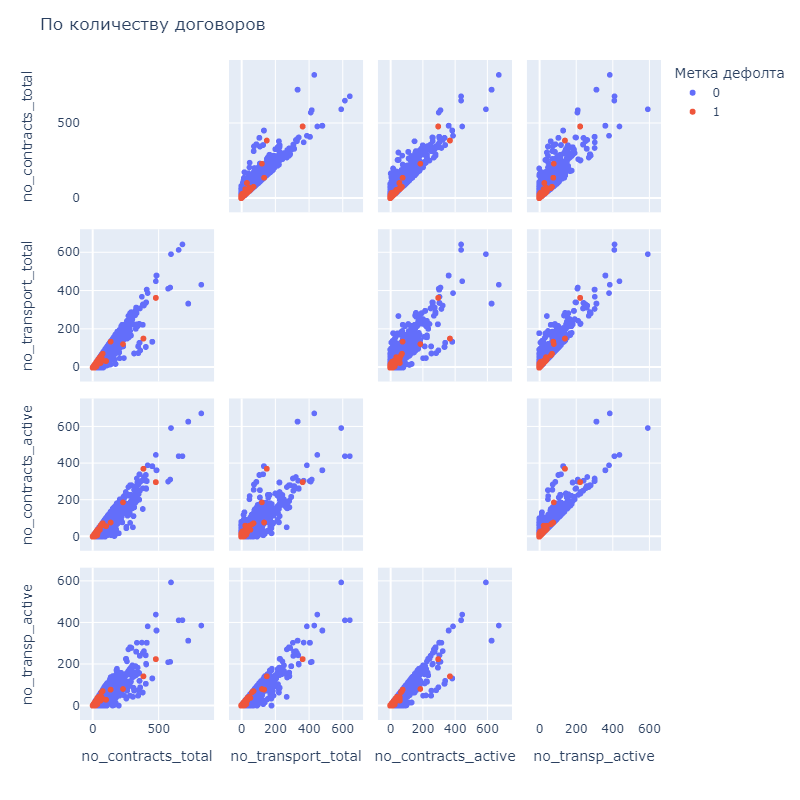

In [11]:
fig_counts = scatter_matrix(target_features, 
                     dimensions=['no_contracts_total', 'no_transport_total', 'no_contracts_active', 'no_transp_active'],
                     title='По количеству договоров',
                     height=800)

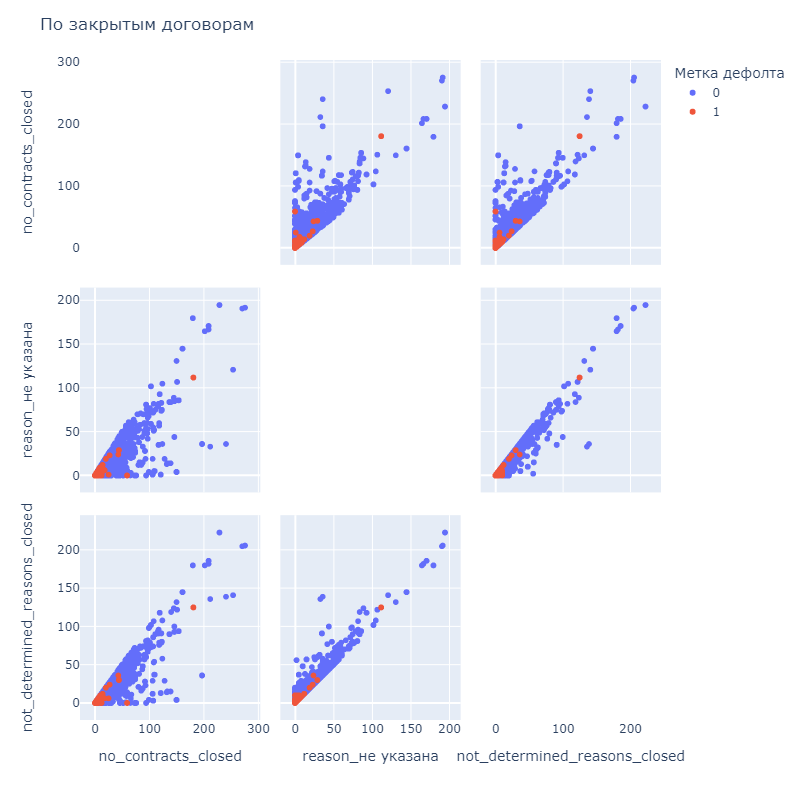

In [12]:
fig_closed = scatter_matrix(target_features, 
                     dimensions=['no_contracts_closed', 'reason_не указана', 'not_determined_reasons_closed'],
                     title='По закрытым договорам',
                     height=800)

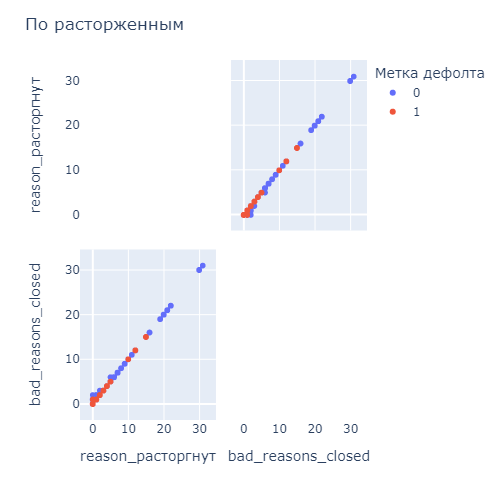

In [13]:
fig_bad_reasons = scatter_matrix(target_features, 
                     dimensions=['reason_расторгнут', 'bad_reasons_closed'],
                     title='По расторженным',
                     height=500)
			

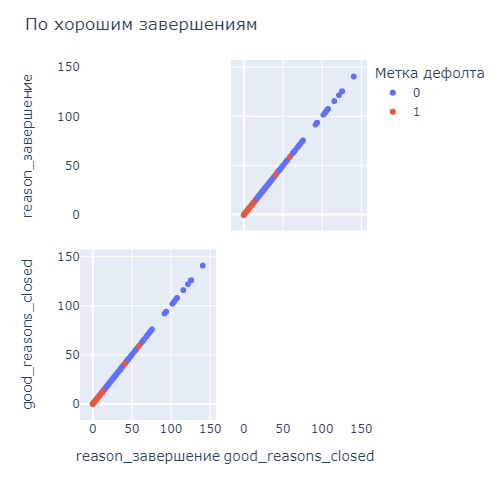

In [14]:
fig_good_reasons = scatter_matrix(target_features, 
                     dimensions=['reason_завершение', 'good_reasons_closed'],
                     title='По хорошим завершениям',
                     height=500)			

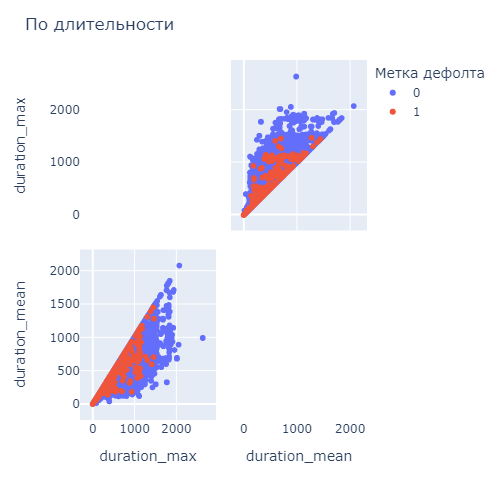

In [15]:
fig_dur = scatter_matrix(target_features, 
                     dimensions=['duration_max', 'duration_mean'],
                     title='По длительности',
                     height=500)

## Заключение из анализа матрицы корреляции и pairplot фичей

Были выделены следующие взаимно-коррелированные группы:
- ['no_contracts_total', 'no_transport_total', 'no_contracts_active', 'no_transp_active']
- ['no_contracts_closed', 'reason_не указана', 'not_determined_reasons_closed']
- ['duration_max', 'duration_mean']
- ['reason_расторгнут', 'bad_reasons_closed']
- ['reason_завершение', 'good_reasons_closed']

### Анализ по взаимно-коррелированным группам:

1. Фичи  'no_contracts_total', 'no_transport_total', 'no_contracts_active', 'no_transp_active' имеют высокую степень корреляции, поэтому
   
- 'no_contracts_total' - оставляется, поскольку эта фича имеет наибольший roc_auc, и его значение больше всего заполнено, так как меньшее количество договоров имеют активные или закрытые на момент принятия решения.   
- 'no_contracts_active' - исключается, так как мультиколлинеарна с 'no_contracts_closed' и 'no_contracts_total' (которую планируется использовать)
- 'no_transp_active' - оставлена под вопросом, так как несмотря на корреляцию 0.63 с 'no_contracts_total', в данных видна гетероскедачность. 
- 'no_transport_total' - исключается, так как есть высокая степень корреляции с уже оставленными 'no_contracts_total' 0.82 и 'no_transp_active' 0.73 с визуальной линейной степенью зависимости. 


2. Фичи  ['no_contracts_closed', 'reason_не указана', 'not_determined_reasons_closed'] имеют высокую степень корреляции, поэтому

- 'no_contracts_closed' - оставляется, поскольку эта фича имеет наибольший roc_auc
- 'not_determined_reasons_closed' - оставляется, поскольку из-за гетероскедачности нет явной линейной зависимости с 'no_contracts_closed', и фича имеет самый большой recall 0.96 в этой группе
- 'reason_не указана' -  исключается, так как имеет явную линейную зависимость с 'not_determined_reasons_closed' 

3. Фичи средняя и максимальная длительность закрытых договоров 'duration_max' и  'duration_mean' не имеют явной линейной зависимости, несмотря на высокую степень корреляции 0.73. Поэтому обе фичи оставляются для дальнейшего анализа 
   
4. Фичи  ['reason_расторгнут', 'bad_reasons_closed'] имеют высокую степень корреляции и сильную линейную зависимости. Характеристики практически одинаковые по однофакторному анализу, но bad_reasons_closed включает в себя больше случав плохого завершения, не только расторжение, но и гибель/тотал, поэтому 
- 'reason_расторгнут' - исключается
- 'bad_reasons_closed' - оставляется

5. Фичи ['reason_завершение', 'good_reasons_closed'] идентичны, что видно на pairplot и корреляции 1, поэтому
- 'reason_завершение' - исключается
- 'good_reasons_closed' - оставляется

Остальные фичи все оставлены, так как не имеют сильной взаимной корреляции.

## Итого исключены по анализу корреляции:

| feature             | Наименование                                                                  |
| ------------------- | ----------------------------------------------------------------------------- |
| no_contracts_active | Количество активных (действующих) договоров                                   |
| no_transp_active    | Количество активных (действующих) договоров только с транспортными средствами |
| reason_завершение   | Количество закрытых договоров по причине завершения договора                  |
| reason_не указана   | Количество закрытых договоров по неуказанной причине                          |
| reason_расторгнут   | Количество закрытых договоров по причине расторжения                          |




In [16]:
# сохраняем tmp таблицы
if len(writer.sheets):
    writer.save()

In [17]:
list_of_fig = [fig_corr, fig_counts,  fig_closed, fig_dur, fig_bad_reasons, fig_good_reasons]

combine_plotly_figs_to_html(list_of_fig, pre+'data/html/feature_correlation.html')